# Imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("data.csv")
data

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


# Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [4]:
data.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [5]:
data=round(data)

In [6]:
data.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.725023,8.947626e+04,0.442299
std,74.944449,2.983323e+06,0.496771
min,-134.000000,-1.350000e+02,0.000000
25%,-72.000000,-8.025000e+01,0.000000
50%,-10.000000,-1.000000e+00,0.000000
75%,60.000000,6.400000e+01,1.000000
max,135.000000,1.000000e+08,1.000000


# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

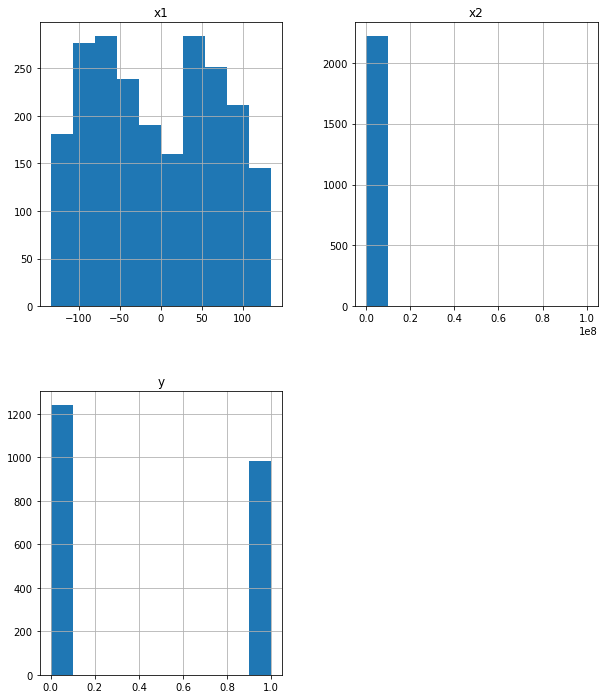

In [7]:
data.hist(figsize=[10,12])

In [8]:
data.corr()

,x1,x2,y
x1,1.000000,0.037397,-0.121346
x2,0.037397,1.000000,-0.026724
y,-0.121346,-0.026724,1.000000


C:\Users\heman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1', ylabel='y'>

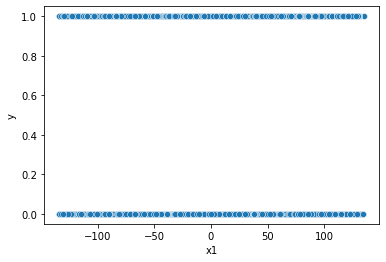

In [9]:
sns.scatterplot(data["x1"],data["y"])

C:\Users\heman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2', ylabel='y'>

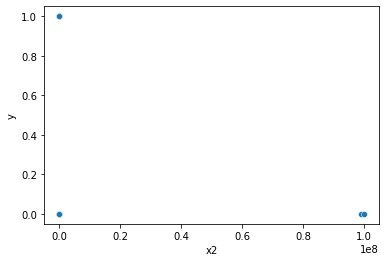

In [10]:
sns.scatterplot(data["x2"],data["y"])

<AxesSubplot:>

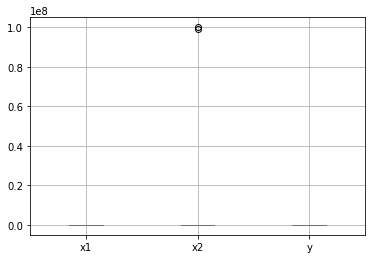

In [11]:
data.boxplot()

# Checking Null Values

In [12]:
data.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

# Filling the Null Values using FFILL

In [13]:
data=data.fillna(method="ffill")

In [14]:
data.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

# Finding Outliers

C:\Users\heman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2'>

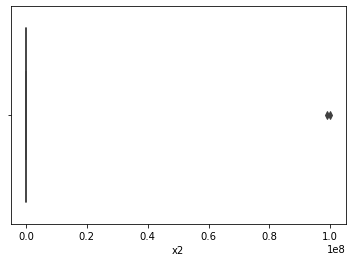

In [15]:
sns.boxplot(data["x2"])

# Treating Outliers

In [16]:
data.shape

(2227, 3)

In [17]:
q1=data['x2'].quantile(0.25)
q3=data['x2'].quantile(0.75)
iqr=q3-q1
print(q1)
print(q3)
print(iqr)
lower_whis=q1-1.5*iqr
upper_whis=q3+1.5*iqr
print(lower_whis,upper_whis)




-80.5
64.0
144.5
-297.25 280.75


In [18]:
data=data[data['x2']<upper_whis]

In [19]:
data.shape

(2225, 3)

C:\Users\heman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x2'>

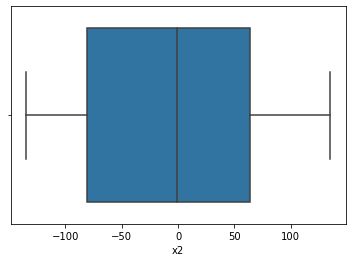

In [20]:
sns.boxplot(data["x2"])

# Splitting data into training and testing sets

In [21]:
x=data.iloc[:,:2]
x

,x1,x2
0,-119.0,115.0
1,-101.0,98.0
2,-130.0,107.0
3,-115.0,101.0
4,-119.0,115.0
...,...,...
2221,88.0,108.0
2222,99.0,90.0
2223,97.0,91.0
2224,86.0,104.0


In [22]:
y=data.iloc[:,-1:]
y

,y
0,1
1,1
2,1
3,1
4,1
...,...
2221,0
2222,0
2223,0
2224,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr=LogisticRegression()

In [27]:
lr.fit(x_train,y_train)

C:\Users\heman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [28]:
y_pred=lr.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
print("Accuracy Score using Logistic Regression is", accuracy_score(y_test,y_pred))

Accuracy Score using Logistic Regression is 0.7280898876404495


In [31]:
confusion_matrix(y_test,y_pred)

array([[236,   0],
       [121,  88]], dtype=int64)

# SVM with linear kernel

In [32]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear',C=1).fit(x_train,y_train)

C:\Users\heman\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
y_pred=svc.predict(x_test)

In [ ]:
print("Accuracy score is",accuracy_score(y_test,y_pred))

# SVM with RBF Kernel

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='rbf',C=1,probability=True,gamma=0.1).fit(x_train,y_train)

In [ ]:
y_pred=svc.predict(x_test)

In [ ]:
print("Accuracy score is",accuracy_score(y_test,y_pred))

# Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
tree_model=tree.DecisionTreeClassifier(criterion='gini')

In [ ]:
tree_model.fit(x_train,y_train)

In [ ]:
y_pred=tree_model.predict(x_test)

In [ ]:
print("Accuracy score is",accuracy_score(y_test,y_pred))


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
print("Accuracy score is",accuracy_score(y_test,y_pred))

# Tuning Hyperparameters for better Accuracy_Score

In [ ]:
def kn():
        y=data.iloc[:,-1:]
        X=data.iloc[:,:2]
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train)
        ypred=knn.predict(x_test)
        return accuracy_score(y_test,ypred)
k_range=[1,2,3,4,5,6,7]           
for k in k_range:
    print("when the n_neighbour is",k, "score is",kn())
    

# Observation

* From these results, it would suggest that Knn with n_neighbors=4 gives the best score as shown in the boxplot too compared to all the other models
* Logistic Regression model gives the accuracy socre of 72.80
* SVM with Linear Kernel model gives the accuracy socre of 72.13
* SVM with RBF Kernel model gives the accuracy socre of 92.58
* Decision Tree model gives the accuracy socre of 93.48
* KNN model at n_neighbors=4  gives the accuracy socre of 93.48